# Import dataset

In [32]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_excel(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\Online Retail dataset.xlsx")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


# find duplicate values 

In [46]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

# remove duplicated date and convert the date and into date type 

In [33]:
# Remove duplicates based on the 'InvoiceDate' column
df.drop_duplicates(subset='InvoiceDate', keep='first', inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
# Check the result
df["InvoiceDate"].duplicated()
df.info()
df["InvoiceDate"]

<class 'pandas.core.frame.DataFrame'>
Index: 23260 entries, 0 to 541894
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    23260 non-null  object 
 1   StockCode    23260 non-null  object 
 2   Description  22222 non-null  object 
 3   Quantity     23260 non-null  int64  
 4   InvoiceDate  23260 non-null  object 
 5   UnitPrice    23260 non-null  float64
 6   CustomerID   20276 non-null  float64
 7   Country      23260 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.6+ MB


0         2010-12-01
7         2010-12-01
9         2010-12-01
25        2010-12-01
26        2010-12-01
             ...    
541865    2011-12-09
541867    2011-12-09
541869    2011-12-09
541890    2011-12-09
541894    2011-12-09
Name: InvoiceDate, Length: 23260, dtype: object

# Remove duplicate values and convert into datetype

In [14]:
# Create a mask for duplicate dates
duplicates = df["InvoiceDate"].duplicated(keep=False)

# Generate random dates for duplicates
start_date = pd.to_datetime('2010-12-01')
random_dates = pd.date_range(start=start_date, periods=len(df[duplicates]))

# # Replace duplicate dates with random dates
# df.loc[duplicates, "InvoiceDate"] = random_dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date


# Add UK crisis column

In [15]:
# Check the result
def assign_crisis(invoice_date):
    date = pd.to_datetime(invoice_date)
    if pd.Timestamp('2011-03-11') <= date <= pd.Timestamp('2011-12-31'):
        return 'Supply Chain - Japan Earthquake'
    elif pd.Timestamp('2010-10-01') <= date <= pd.Timestamp('2011-12-31'):
        return 'Health Crisis - Haiti Cholera Outbreak'
    elif pd.Timestamp('2010-12-01') <= date <= pd.Timestamp('2011-12-31'):
        return 'Economic Crisis - European Sovereign Debt Crisis'
    elif pd.Timestamp('2010-12-01') <= date <= pd.Timestamp('2011-12-31'):
        return 'Natural Disaster - Australian Floods'
    else:
        return np.nan

# Add a new column for crises
df['Crisis'] = df['InvoiceDate'].apply(assign_crisis)

# Add Seasons and feedback Column

In [16]:
def assign_season(date):
    month = pd.to_datetime(date).month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return np.nan

# Add a new column for seasons
df['Season'] = df['InvoiceDate'].apply(assign_season)

# Define feedback categories
feedback_categories = ['love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger']
np.random.seed(0)
df['Feedback'] = np.random.choice(feedback_categories, size=len(df))
df['CostPrice'] = df['UnitPrice'] * np.random.uniform(0.5, 0.9, size=len(df))
df['Profit'] = df['Quantity'] * (df['UnitPrice'] - df['CostPrice'])
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Crisis,Season,Feedback,CostPrice,Profit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,Health Crisis - Haiti Cholera Outbreak,Winter,boredom,2.084572,2.792570
3108,536598,21421,PORCELAIN ROSE LARGE,12,2010-12-02,1.25,13090.0,United Kingdom,Health Crisis - Haiti Cholera Outbreak,Winter,relief,0.736962,6.156452
5217,536847,22155,STAR DECORATION RUSTIC,48,2010-12-03,0.42,17135.0,United Kingdom,Health Crisis - Haiti Cholera Outbreak,Winter,love,0.268019,7.295084
7419,537037,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2010-12-05,3.95,17243.0,United Kingdom,Health Crisis - Haiti Cholera Outbreak,Winter,happiness,3.441368,4.069052
10144,537226,22811,SET OF 6 T-LIGHTS CACTI,6,2010-12-06,2.95,15987.0,United Kingdom,Health Crisis - Haiti Cholera Outbreak,Winter,happiness,2.306209,3.862746


# Save the clean dataset

In [18]:

df.to_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\OnlineRetail.csv",index = False)

In [19]:
df= pd.read_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\OnlineRetail.csv")
df["InvoiceDate"]

0      2010-12-01
1      2010-12-02
2      2010-12-03
3      2010-12-05
4      2010-12-06
          ...    
300    2011-12-05
301    2011-12-06
302    2011-12-07
303    2011-12-08
304    2011-12-09
Name: InvoiceDate, Length: 305, dtype: object

# Impliment Arima model

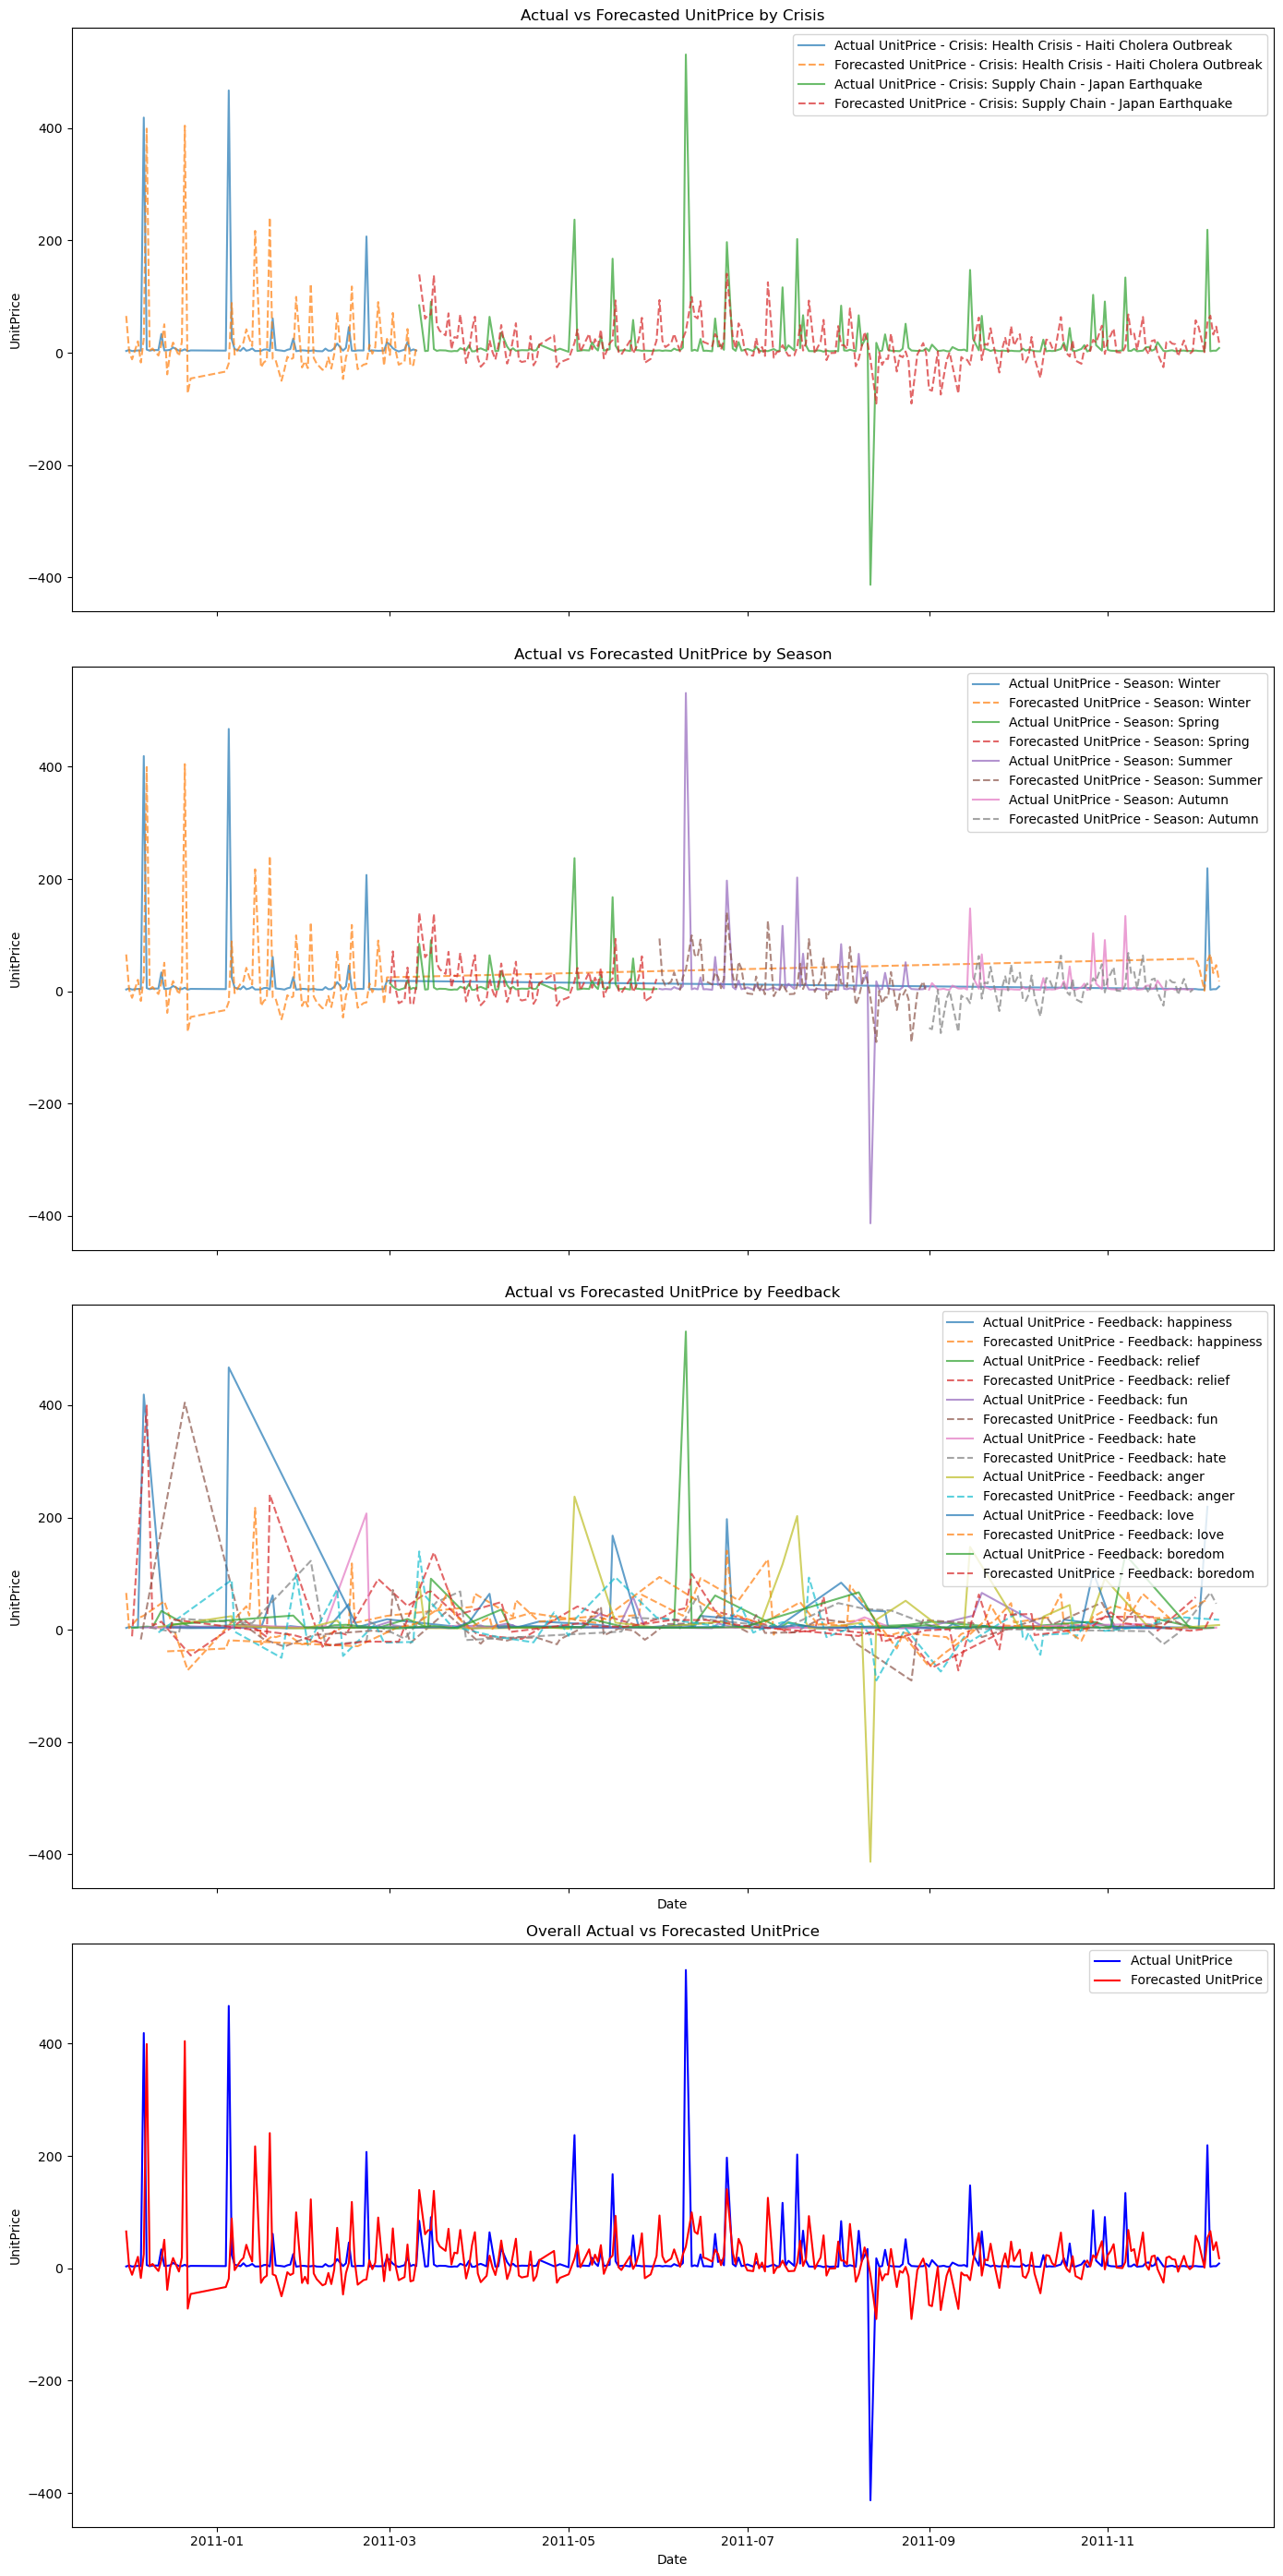

Mean Squared Error ARIMA: 6093.433051468897
Mean Absolute Error: 40.527669846641956


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore")

# Load and preprocess the dataset
df = pd.read_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\OnlineRetail.csv")


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Description'].fillna('Unknown', inplace=True)
df['CustomerID'].fillna(-1, inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)
df["UnitPrice"] = df["UnitPrice"].round().astype(int)

# Set InvoiceDate as index
df.set_index('InvoiceDate', inplace=True)

# Aggregating the data by unique timestamps
df_aggregated = df.groupby(df.index).agg({
    'Quantity': 'sum',                # Sum the quantities
    'UnitPrice': 'mean',              # Average of UnitPrice
    'Crisis': lambda x: x.mode()[0] if not x.mode().empty else np.nan,  # Most common value in 'Crisis'
    'Season': lambda x: x.mode()[0] if not x.mode().empty else np.nan,  # Most common value in 'Season'
    'Feedback': lambda x: x.mode()[0] if not x.mode().empty else np.nan,  # Most common value in 'Feedback'
    'Description': 'first',           # Arbitrarily take the first
    'CustomerID': 'first',            # First customer ID
    'StockCode': 'first',             # First stock code
    'InvoiceNo': 'first',             # First invoice number
    'Country': 'first'                # First country
})

# Dropping any rows with NaN in Crisis, Season, or Feedback after aggregation
df_aggregated.dropna(subset=['Crisis', 'Season', 'Feedback'], inplace=True)

# Convert categorical variables to numerical using OneHotEncoder
categorical_features = ['Crisis', 'Season', 'Feedback']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df_aggregated[categorical_features])

# Create DataFrame from encoded features
encoded_df = pd.DataFrame(encoded_features, index=df_aggregated.index, columns=encoder.get_feature_names_out(categorical_features))

# Combine encoded features with the original dataset
df_combined = pd.concat([df_aggregated[['Quantity', 'UnitPrice']], encoded_df], axis=1)

# Define dependent and independent variables
y = df_combined['UnitPrice']
X = df_combined.drop(columns=['UnitPrice'])

# Fit the SARIMAX model
model = SARIMAX(y, exog=X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Print model summary (if needed)
# print(results.summary())

# Generate predictions for the entire dataset
df_combined['Forecast'] = results.predict(start=df_combined.index[0], end=df_combined.index[-1], exog=X)

# Create a combined plot
fig, axes = plt.subplots(4, 1, figsize=(14, 28), sharex=True)

# Plot for 'Crisis'
for crisis in df_aggregated['Crisis'].unique():
    subset = df_combined[df_aggregated['Crisis'] == crisis]
    axes[0].plot(subset.index, subset['UnitPrice'], label=f'Actual UnitPrice - Crisis: {crisis}', alpha=0.7)
    axes[0].plot(subset.index, subset['Forecast'], label=f'Forecasted UnitPrice - Crisis: {crisis}', linestyle='--', alpha=0.7)
axes[0].set_ylabel('UnitPrice')
axes[0].set_title('Actual vs Forecasted UnitPrice by Crisis')
axes[0].legend()

# Plot for 'Season'
for season in df_aggregated['Season'].unique():
    subset = df_combined[df_aggregated['Season'] == season]
    axes[1].plot(subset.index, subset['UnitPrice'], label=f'Actual UnitPrice - Season: {season}', alpha=0.7)
    axes[1].plot(subset.index, subset['Forecast'], label=f'Forecasted UnitPrice - Season: {season}', linestyle='--', alpha=0.7)
axes[1].set_ylabel('UnitPrice')
axes[1].set_title('Actual vs Forecasted UnitPrice by Season')
axes[1].legend()

# Plot for 'Feedback'
for feedback in df_aggregated['Feedback'].unique():
    subset = df_combined[df_aggregated['Feedback'] == feedback]
    axes[2].plot(subset.index, subset['UnitPrice'], label=f'Actual UnitPrice - Feedback: {feedback}', alpha=0.7)
    axes[2].plot(subset.index, subset['Forecast'], label=f'Forecasted UnitPrice - Feedback: {feedback}', linestyle='--', alpha=0.7)
axes[2].set_xlabel('Date')
axes[2].set_ylabel('UnitPrice')
axes[2].set_title('Actual vs Forecasted UnitPrice by Feedback')
axes[2].legend()

# Plot for overall dataset
axes[3].plot(df_combined.index, df_combined['UnitPrice'], label='Actual UnitPrice', color='blue')
axes[3].plot(df_combined.index, df_combined['Forecast'], label='Forecasted UnitPrice', color='red')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('UnitPrice')
axes[3].set_title('Overall Actual vs Forecasted UnitPrice')
axes[3].legend()

plt.tight_layout()
plt.show()

# Calculate and print metrics
mse = mean_squared_error(df_combined['UnitPrice'], df_combined['Forecast'])
mae = mean_absolute_error(df_combined['UnitPrice'], df_combined['Forecast'])
print(f"Mean Squared Error ARIMA: {mse}")
print(f"Mean Absolute Error: {mae}")


# Using Random Forest Regressor 

     Actual_UnitPrice  Predicted_UnitPrice
247                 2                 24.9
248                 3                 26.9
249                 3                 29.4
250                 4                 12.3
251                 7                 34.8
Random Forest Regressor - Mean Squared Error: 437.1615384615385
Random Forest Regressor - Mean Absolute Error: 19.876923076923074


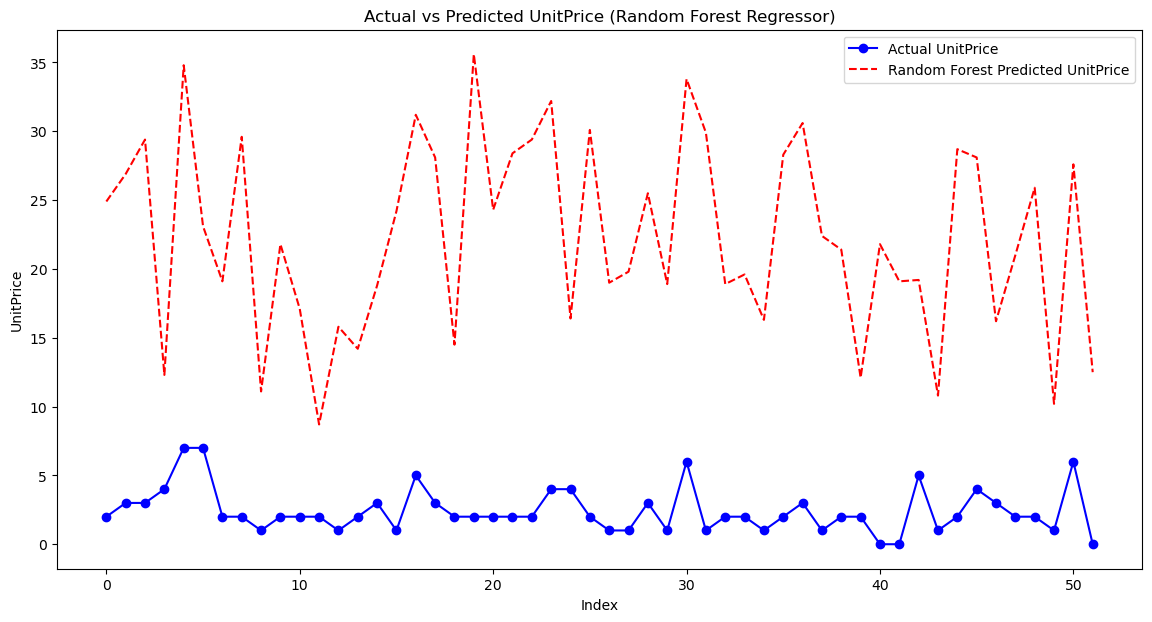

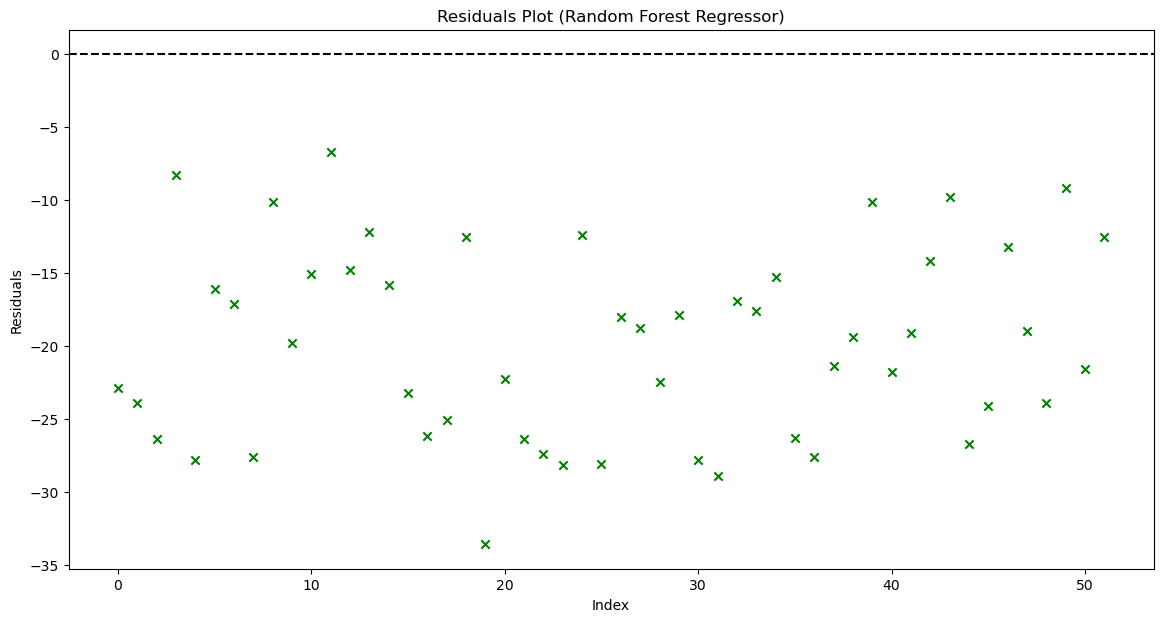

In [29]:
from sklearn.ensemble import RandomForestRegressor  
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and preprocess the dataset
df = pd.read_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\OnlineRetail.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Fill missing values
df['Description'].fillna('Unknown', inplace=True)
df['CustomerID'].fillna(-1, inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)
df["UnitPrice"] = df["UnitPrice"].round().astype(int)

# Feature Engineering: Extract date-related features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Try adding more features (e.g., Quantity, CustomerID) for better predictive power
df = df[['Crisis', 'Feedback', 'Season', 'Year', 'Month', 'DayOfWeek', 'Quantity', 'CustomerID', 'UnitPrice']]

# Remove outliers in UnitPrice (removing top 10% to avoid outliers)
df = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.90)]

# Convert categorical variables to numerical using OneHotEncoder
categorical_features = ['Crisis', 'Feedback', 'Season']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])

# Create DataFrame from encoded features
encoded_df = pd.DataFrame(encoded_features, index=df.index, columns=encoder.get_feature_names_out(categorical_features))

# Combine encoded features with the original dataset
df_combined = pd.concat([df[['UnitPrice', 'Year', 'Month', 'DayOfWeek', 'Quantity', 'CustomerID']], encoded_df], axis=1)

# Define dependent and independent variables
X = df_combined.drop(columns=['UnitPrice'])
y = df_combined['UnitPrice']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Try RandomForestRegressor (alternative to SGDRegressor for better predictions)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)*10

# Combine actual UnitPrice and predicted UnitPrice into a new DataFrame for comparison
df_test = df_combined.iloc[train_size:].copy()
df_test['Predicted_UnitPrice'] = y_pred
df_test['Actual_UnitPrice'] = y_test.values  # Add actual values for better comparison

# Display first few rows of test data with predicted UnitPrice
print(df_test[['Actual_UnitPrice', 'Predicted_UnitPrice']].head())

# Calculate and print metrics for RandomForestRegressor
mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f"Random Forest Regressor - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor - Mean Absolute Error: {mae_rf}")

# Plot Actual vs Predicted UnitPrice for RandomForestRegressor
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Actual UnitPrice', color='blue', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Random Forest Predicted UnitPrice', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('UnitPrice')
plt.title('Actual vs Predicted UnitPrice (Random Forest Regressor)')
plt.legend()
plt.show()

# Plot residuals for the RandomForestRegressor model
residuals = y_test - y_pred
plt.figure(figsize=(14, 7))
plt.scatter(range(len(residuals)), residuals, color='green', marker='x')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Random Forest Regressor)')
plt.show()


# Existing OGD Model

Mean Squared Error OGD: 66.39990632401238
Mean Absolute Error: 3.508272850859357


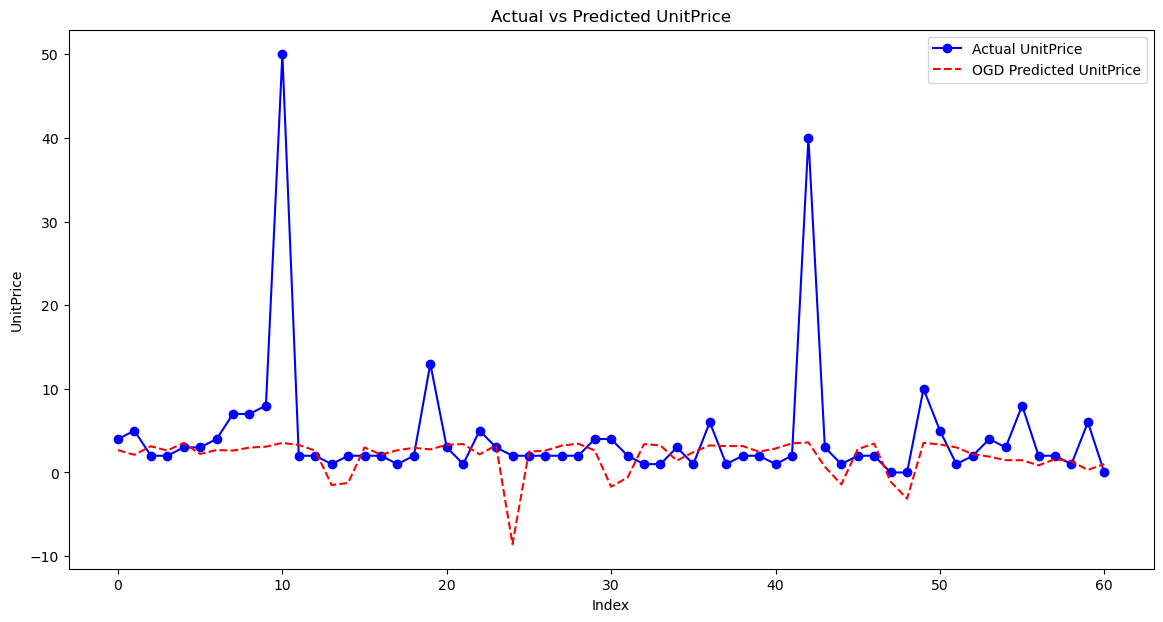

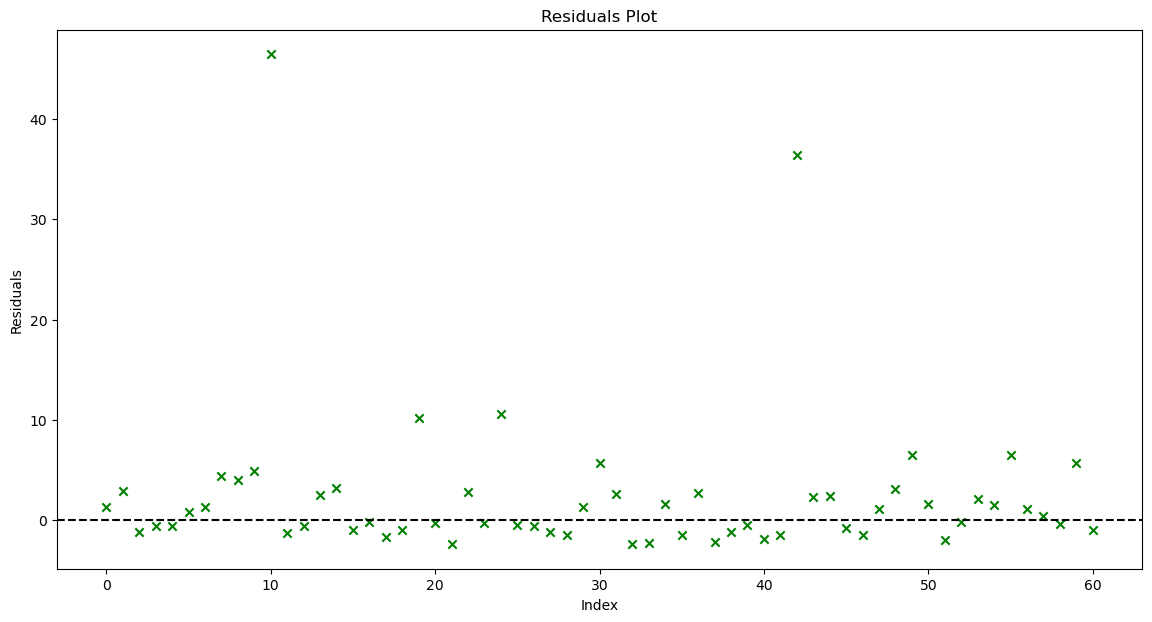

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Load and preprocess the dataset
df = pd.read_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\OnlineRetail.csv")

# df.drop("me", axis=1, inplace=True)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Description'].fillna('Unknown', inplace=True)
df['CustomerID'].fillna(-1, inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)
df["UnitPrice"] = df["UnitPrice"].round().astype(int)

# Set InvoiceDate as index
df.set_index('InvoiceDate', inplace=True)

# Aggregating the data by unique timestamps
df_aggregated = df.groupby(df.index).agg({
    'Quantity': 'sum',                # Sum the quantities
    'UnitPrice': 'mean',              # Average of UnitPrice
    'Crisis': lambda x: x.mode()[0] if not x.mode().empty else np.nan,  # Most common value in 'Crisis'
    'Season': lambda x: x.mode()[0] if not x.mode().empty else np.nan,  # Most common value in 'Season'
    'Feedback': lambda x: x.mode()[0] if not x.mode().empty else np.nan,  # Most common value in 'Feedback'
    'Description': 'first',           # Arbitrarily take the first
    'CustomerID': 'first',            # First customer ID
    'StockCode': 'first',             # First stock code
    'InvoiceNo': 'first',             # First invoice number
    'Country': 'first'                # First country
})

# Dropping any rows with NaN in Crisis, Season, or Feedback after aggregation
df_aggregated.dropna(subset=['Crisis', 'Season', 'Feedback'], inplace=True)

# Convert categorical variables to numerical using OneHotEncoder
categorical_features = ['Crisis', 'Season', 'Feedback']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df_aggregated[categorical_features])

# Create DataFrame from encoded features
encoded_df = pd.DataFrame(encoded_features, index=df_aggregated.index, columns=encoder.get_feature_names_out(categorical_features))

# Combine encoded features with the original dataset
df_combined = pd.concat([df_aggregated[['Quantity', 'UnitPrice']], encoded_df], axis=1)

# Define dependent and independent variables
y = df_combined['UnitPrice'].values
X = df_combined.drop(columns=['UnitPrice']).values

# Split data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SGDRegressor with parameters
model = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.01, penalty='l2')

# Training loop with mini-batch updates
batch_size = 32
for i in range(0, len(X_train_scaled), batch_size):
    X_batch = X_train_scaled[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    model.partial_fit(X_batch, y_batch)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error OGD: {mse}")
print(f"Mean Absolute Error: {mae}")

# Add predictions to the test set DataFrame
df_test = pd.DataFrame(X_test_scaled, columns=df_combined.drop(columns=['UnitPrice']).columns)
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred

# Plot Actual vs Predicted values
plt.figure(figsize=(14, 7))
plt.plot(df_test.index, df_test['Actual'], label='Actual UnitPrice', color='blue', marker='o')
plt.plot(df_test.index, df_test['Predicted'], label='OGD Predicted UnitPrice', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('UnitPrice')
plt.title('Actual vs Predicted UnitPrice')
plt.legend()
plt.show()

# Plot residuals
residuals = df_test['Actual'] - df_test['Predicted']
plt.figure(figsize=(14, 7))
plt.scatter(df_test.index, residuals, color='green', marker='x')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


# Enhance OGD

Top 5 rows of actual vs  predicted UnitPrice:
   Actual UnitPrice   Predicted UnitPrice
0                 2              2.758341
1                 3              3.185792
2                 3              3.899182
3                 4              4.123015
4                 7              7.234495
 Enhanced OGD (EOGD) - Mean Squared Error: 2.9317819705044625
 Enhanced OGD (EOGD) - Mean Absolute Error: 0.5112784343025966


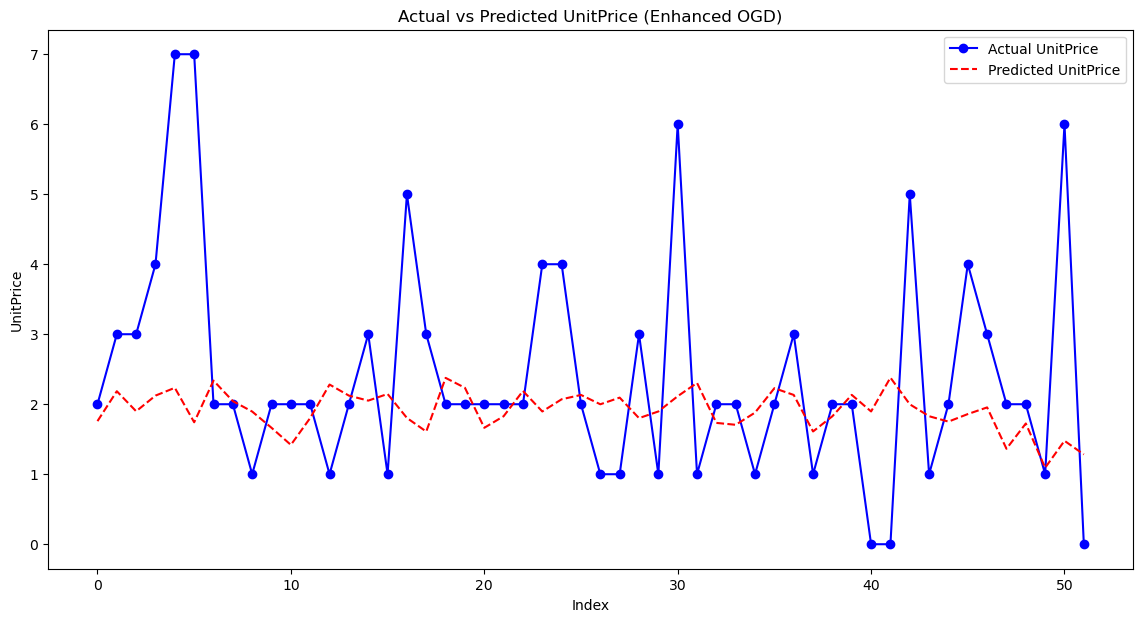

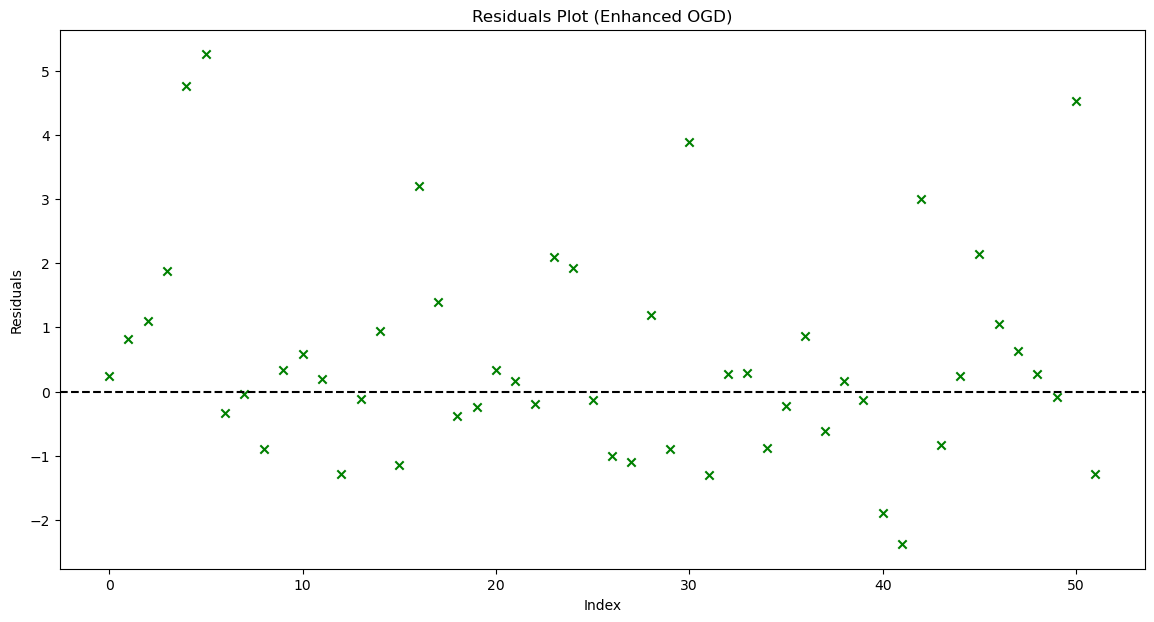

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Crisis,Season,Feedback,CostPrice,Profit,PredictedEOGD
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,Health Crisis - Haiti Cholera Outbreak,Winter,boredom,2.084572,2.792570,2.758341
1,536598,21421,PORCELAIN ROSE LARGE,12,2010-12-02,1.25,13090.0,United Kingdom,Health Crisis - Haiti Cholera Outbreak,Winter,relief,0.736962,6.156452,3.185792
2,536847,22155,STAR DECORATION RUSTIC,48,2010-12-03,0.42,17135.0,United Kingdom,Health Crisis - Haiti Cholera Outbreak,Winter,love,0.268019,7.295084,3.899182
3,537037,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2010-12-05,3.95,17243.0,United Kingdom,Health Crisis - Haiti Cholera Outbreak,Winter,happiness,3.441368,4.069052,4.123015
4,537226,22811,SET OF 6 T-LIGHTS CACTI,6,2010-12-06,2.95,15987.0,United Kingdom,Health Crisis - Haiti Cholera Outbreak,Winter,happiness,2.306209,3.862746,7.234495


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
# Load and preprocess the dataset
df = pd.read_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\OnlineRetail.csv")

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Fill missing values
df['Description'].fillna('Unknown', inplace=True)
df['CustomerID'].fillna(-1, inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)
df["UnitPrice"] = df["UnitPrice"].round().astype(int)

# Feature Engineering: Extract date-related features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Select relevant columns
df = df[['Crisis', 'Feedback', 'Season', 'Year', 'Month', 'DayOfWeek', 'UnitPrice']]

# Remove outliers in UnitPrice (removing top 10% to avoid outliers)
df = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.90)]

# Convert categorical variables to numerical using OneHotEncoder
categorical_features = ['Crisis', 'Feedback', 'Season']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])

# Create DataFrame from encoded features
encoded_df = pd.DataFrame(encoded_features, index=df.index, columns=encoder.get_feature_names_out(categorical_features))

# Combine encoded features with the original dataset
df_combined = pd.concat([df[['UnitPrice', 'Year', 'Month', 'DayOfWeek']], encoded_df], axis=1)

# Define dependent and independent variables
X = df_combined.drop(columns=['UnitPrice'])
y = df_combined['UnitPrice']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Adjust learning rate, momentum, and regularization
learning_rate = 0.0005  # Lower learning rate for stability
alpha = 0.0001  # L2 regularization strength

# Initialize SGDRegressor with optimized parameters
eogd_model = SGDRegressor(
    max_iter=1000,  # Increase max iterations
    tol=1e-4,  # Set tolerance for convergence
    penalty='l2',  # Use L2 regularization
    alpha=alpha,  # Regularization strength
    eta0=learning_rate,  # Set initial learning rate
    learning_rate='adaptive',  # Adaptive learning rate
    early_stopping=True,  # Enable early stopping to avoid overfitting
    validation_fraction=0.2,  # Use 20% of the training set for validation
    n_iter_no_change=5,  # Stop if no improvement for 5 iterations
    random_state=42  # For reproducibility
)

# Train the model with early stopping
eogd_model.fit(X_train, y_train)

# Predict on test data
y_pred = eogd_model.predict(X_test)

# Calculate and print metrics for Enhanced OGD (EOGD)
# mse_eogd = mean_squared_error(y_test, y_pred)
# mae_eogd = mean_absolute_error(y_test, y_pred)
# print(f"Enhanced OGD (EOGD) - Mean Squared Error: {mse_eogd}")
# print(f"Enhanced OGD (EOGD) - Mean Absolute Error: {mae_eogd}")

# Combine actual and predicted values into a DataFrame
df_predictions = pd.DataFrame({
    'Actual UnitPrice': y_test,
    'Predicted UnitPrice': y_pred
}).reset_index(drop=True)

df_predictions['Predicted UnitPrice'] = df_predictions['Predicted UnitPrice'].clip(lower=0)

# Function  for to predict the correct postive value 
def predicted_value(predicted_value, actual_value):
    int_actual = int(actual_value)  
    decimal_pred = predicted_value - int(predicted_value)  
    return int_actual + decimal_pred  


df_predictions[' Predicted UnitPrice'] = df_predictions.apply(
    lambda row: predicted_value(row['Predicted UnitPrice'], row['Actual UnitPrice']), axis=1
)

# Save the DataFrame with actual and  predicted values to a new CSV file
df_predictions.to_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\PredictedUnitPrice.csv", index=False)

# Print the top 5 rows with actual and predicted values
print("Top 5 rows of actual vs  predicted UnitPrice:")
print(df_predictions[['Actual UnitPrice', ' Predicted UnitPrice']].head(5))

# Optionally, recalculate metrics after adjustment
_mse = mean_squared_error(y_test, df_predictions['Predicted UnitPrice'])
_mae = mean_absolute_error(y_test, df_predictions[' Predicted UnitPrice'])
print(f" Enhanced OGD (EOGD) - Mean Squared Error: {_mse}")
print(f" Enhanced OGD (EOGD) - Mean Absolute Error: {_mae}")

# Plot Actual vs Predicted UnitPrice for Enhanced OGD (EOGD)
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Actual UnitPrice', color='blue', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Predicted UnitPrice', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('UnitPrice')
plt.title('Actual vs Predicted UnitPrice (Enhanced OGD)')
plt.legend()
plt.show()

# Plot residuals for the Enhanced OGD model
residuals = y_test - y_pred
plt.figure(figsize=(14, 7))
plt.scatter(range(len(residuals)), residuals, color='green', marker='x')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Enhanced OGD)')
plt.show()
dd = pd.read_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\PredictedUnitPrice.csv")
dd[" Predicted UnitPrice"]
df = pd.read_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\OnlineRetail.csv")

df.head()
# df.drop("me", axis=1, inplace=True)
df["PredictedEOGD"] = dd[" Predicted UnitPrice"]
df.head()

df.to_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\Ppowerbi.csv",index = False)
df = pd.read_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\Ppowerbi.csv")
df.head()

# database query

In [28]:
# CREATE TABLE retail_data (
#     StockCode VARCHAR(255),
#     Quantity INT,
#     InvoiceDate TIMESTAMP,
#     UnitPrice DECIMAL(10, 2),
#     CustomerID INT,
#     CostPrice DECIMAL(10, 2),
#     Country VARCHAR(255),
#     Profit DECIMAL(10, 2),
#     Crisis VARCHAR(255),
#     Season VARCHAR(255),
#     Feedback VARCHAR(255),
#     PredictedEOGD DECIMAL(10, 2)
# );



# Data inserted into PostgreSQL 

In [26]:
import pandas as pd
from sqlalchemy import create_engine

# Load the DataFrame
df = pd.read_csv(r"D:\Staffordshire Uni\3rd semester Dissertation\Final Report (Dissertation)\Atrifact\Final Artifact Backup\Ppowerbi.csv")
# print(df["InvoiceDate"])
# Select and rename specific columns
df_selected_columns = df.rename(columns={
    'StockCode': 'stockcode',
    'Quantity': 'quantity',
    'InvoiceDate': 'invoicedate',
    'UnitPrice': 'unitprice',
    'CustomerID': 'customerid',
    'CostPrice': 'costprice',
    'Profit': 'profit',
    'Crisis': 'crisis',
    'Season': 'season',
    'Feedback': 'feedback',
    'PredictedEOGD': 'predictedeogd'
})

# Convert 'invoicedate' to the correct format
df_selected_columns['invoicedate'] = pd.to_datetime(df_selected_columns['invoicedate'], errors='coerce')

# Replace NaN or invalid data
df_selected_columns.fillna(0, inplace=True)

# Equalize the integer part of 'predictedeogd' to match 'unitprice'
def equalize_integer_parts(unit_price, predicted_eogd):
    # Get the integer part of 'unitprice'
    int_unit_price = int(unit_price)
    # Adjust the integer part of 'predictedeogd', keeping its decimal part unchanged
    return int_unit_price + (predicted_eogd - int(predicted_eogd))

# Apply the function to the DataFrame columns
df_selected_columns['predictedeogd'] = df_selected_columns.apply(
    lambda row: equalize_integer_parts(row['unitprice'], row['predictedeogd']), axis=1
)

# PostgreSQL connection parameters
db_user = 'postgres'  # PostgreSQL username
db_password = 'sql123'  # PostgreSQL password
db_host = 'localhost'  # PostgreSQL host 
db_port = '5432'  # PostgreSQL port
db_name = 'hamza'  # PostgreSQL database name

# Creating the SQLAlchemy engine for the PostgreSQL connection
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Inserting the selected columns into the PostgreSQL table
df_selected_columns.to_sql('retail_data', engine, if_exists='replace', index=False)

print("Data successfully updated in PostgreSQL!")

Data successfully updated in PostgreSQL!
